In [1]:
# PySpark API:
#http://spark.apache.org/docs/latest/api/python/index.html

import os
import sys
 
os.environ["SPARK_HOME"] = "/usr/spark2.4.3"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("appName2")
sc = SparkContext(conf=conf)

In [2]:
# initialise sc
#from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext, HiveContext
from pyspark.sql.types import *
#sc= SparkContext()
sqlContext = SQLContext(sc)


# get python and spark versions
import platform
print(platform.python_version())
print(sc.version)

# import python sql libraries and other functions 
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *

# import python library for plotting data
import matplotlib.pyplot as plt
import gmplot

#import pandas and numpy
import pandas as pd
#import numpy as np


3.6.8
2.4.3


In [3]:
#creating rdd and fetching 2 csv files of accident 2019 and 2020 
# data source: https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data
rddRoad=sc.textFile("hdfs:///user/imat5322_819715/accident*.csv").map(lambda l:l.split(','))

In [4]:
#appyling some methods like count take to check rdd 
#total number of data rows
rddRoad.count()

208737

In [5]:
rddRoad.take(10)

[['accident_index',
  'accident_year',
  'accident_reference',
  'location_easting_osgr',
  'location_northing_osgr',
  'longitude',
  'latitude',
  'police_force',
  'accident_severity',
  'number_of_vehicles',
  'number_of_casualties',
  'date',
  'day_of_week',
  'time',
  'local_authority_district',
  'local_authority_ons_district',
  'local_authority_highway',
  'first_road_class',
  'first_road_number',
  'road_type',
  'speed_limit',
  'junction_detail',
  'junction_control',
  'second_road_class',
  'second_road_number',
  'pedestrian_crossing_human_control',
  'pedestrian_crossing_physical_facilities',
  'light_conditions',
  'weather_conditions',
  'road_surface_conditions',
  'special_conditions_at_site',
  'carriageway_hazards',
  'urban_or_rural_area',
  'did_police_officer_attend_scene_of_accident',
  'trunk_road_flag',
  'lsoa_of_accident_location'],
 ['2019010128300',
  '2019',
  '010128300',
  '528218',
  '180407',
  '-0.153842',
  '51.508057',
  '1',
  '3',
  '2',
  '

In [6]:
#checking first row entries
rddRoad.first()

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

In [7]:
#identify header for rddRoad
header=rddRoad.first()
header

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

In [8]:
display(header)

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

In [9]:
#assigning data without header to create a new data rdd
filtered=rddRoad.filter(lambda line:line!=header)
filtered.count()

208735

In [10]:
#check first 10 row entries
filtered.take(10)

[['2019010128300',
  '2019',
  '010128300',
  '528218',
  '180407',
  '-0.153842',
  '51.508057',
  '1',
  '3',
  '2',
  '3',
  '18/02/2019',
  '2',
  '17:50',
  '1',
  'E09000033',
  'E09000033',
  '3',
  '4202',
  '1',
  '30',
  '1',
  '2',
  '3',
  '4202',
  '0',
  '5',
  '1',
  '1',
  '1',
  '0',
  '0',
  '1',
  '3',
  '2',
  'E01004762'],
 ['2019010152270',
  '2019',
  '010152270',
  '530219',
  '172463',
  '-0.127949',
  '51.436208',
  '1',
  '3',
  '2',
  '1',
  '15/01/2019',
  '3',
  '21:45',
  '9',
  'E09000022',
  'E09000022',
  '3',
  '23',
  '2',
  '30',
  '0',
  '-1',
  '-1',
  '-1',
  '9',
  '9',
  '4',
  '1',
  '1',
  '0',
  '0',
  '1',
  '3',
  '2',
  'E01003117'],
 ['2019010155191',
  '2019',
  '010155191',
  '530222',
  '182543',
  '-0.124193',
  '51.526795',
  '1',
  '3',
  '2',
  '1',
  '01/01/2019',
  '3',
  '01:50',
  '2',
  'E09000007',
  'E09000007',
  '4',
  '504',
  '6',
  '30',
  '3',
  '4',
  '6',
  '0',
  '0',
  '0',
  '4',
  '1',
  '1',
  '0',
  '0',
  '1'

In [11]:
#Mapping column names to row entries

AccidentVar=filtered.map(lambda x:Row(accident_index=x[0],accident_year=x[1],\
        accident_reference=x[2],location_easting_osgr=x[3],location_northing_osgr=x[4],\
        longitude=x[5],latitude= x[6],police_force=x[7],accident_severity=x[8],\
        number_of_vehicles=x[9],number_of_casualties=x[10],date=x[11],day_of_week=x[12],\
        time=x[13],local_authority_district=x[14],\
        local_authority_ons_district= x[15],local_authority_highway=x[16],\
        first_road_class=x[17],first_road_number=x[18],\
        road_type=x[19],speed_limit= x[20],junction_detail=x[21],junction_control=x[22],\
        second_road_class=x[23],second_road_number= x[24],pedestrian_crossing_human_control=x[25],pedestrian_crossing_physical_facilities=x[26],\
        light_conditions=x[27],weather_conditions= x[28],road_surface_conditions=x[29],special_conditions_at_site=x[30],\
        carriageway_hazards=x[31],urban_or_rural_area= x[32],did_police_officer_attend_scene_of_accident=x[33],trunk_road_flag=x[34], \
        lsoa_of_accident_location=x[35]))

In [12]:
#creating dataframe
roadframe=sqlContext.createDataFrame(AccidentVar)

In [13]:
#NOTE Here it shows the data type type of all headers is String I have change the type of some of the coulumn like
#longitude and latitude to double in line IN[41]

#checking dataframe for schema
roadframe.printSchema()

root
 |-- accident_index: string (nullable = true)
 |-- accident_reference: string (nullable = true)
 |-- accident_severity: string (nullable = true)
 |-- accident_year: string (nullable = true)
 |-- carriageway_hazards: string (nullable = true)
 |-- date: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- did_police_officer_attend_scene_of_accident: string (nullable = true)
 |-- first_road_class: string (nullable = true)
 |-- first_road_number: string (nullable = true)
 |-- junction_control: string (nullable = true)
 |-- junction_detail: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- light_conditions: string (nullable = true)
 |-- local_authority_district: string (nullable = true)
 |-- local_authority_highway: string (nullable = true)
 |-- local_authority_ons_district: string (nullable = true)
 |-- location_easting_osgr: string (nullable = true)
 |-- location_northing_osgr: string (nullable = true)
 |-- longitude: string (nullable = true)
 

In [14]:
roadframe.count()

208735

In [15]:
roadframe.show()

+--------------+------------------+-----------------+-------------+-------------------+----------+-----------+-------------------------------------------+----------------+-----------------+----------------+---------------+---------+----------------+------------------------+-----------------------+----------------------------+---------------------+----------------------+---------+-------------------------+--------------------+------------------+---------------------------------+---------------------------------------+------------+-----------------------+---------+-----------------+------------------+--------------------------+-----------+-----+---------------+-------------------+------------------+
|accident_index|accident_reference|accident_severity|accident_year|carriageway_hazards|      date|day_of_week|did_police_officer_attend_scene_of_accident|first_road_class|first_road_number|junction_control|junction_detail| latitude|light_conditions|local_authority_district|local_authority_hig

In [16]:
#data cleaning
#drop column 
#here drop a coulums which are not useful
filtered_rdd = roadframe.drop("lsoa_of_accident_location","carriageway_hazards")


In [17]:
filtered_rdd.printSchema()

root
 |-- accident_index: string (nullable = true)
 |-- accident_reference: string (nullable = true)
 |-- accident_severity: string (nullable = true)
 |-- accident_year: string (nullable = true)
 |-- date: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- did_police_officer_attend_scene_of_accident: string (nullable = true)
 |-- first_road_class: string (nullable = true)
 |-- first_road_number: string (nullable = true)
 |-- junction_control: string (nullable = true)
 |-- junction_detail: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- light_conditions: string (nullable = true)
 |-- local_authority_district: string (nullable = true)
 |-- local_authority_highway: string (nullable = true)
 |-- local_authority_ons_district: string (nullable = true)
 |-- location_easting_osgr: string (nullable = true)
 |-- location_northing_osgr: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- number_of_casualties: string (nullable = true)


In [18]:
# filtered_rdd.show()
#Showing my data in Panda for better representation 
pdpyr=filtered_rdd.toPandas()
pdpyr

,accident_index,accident_reference,accident_severity,accident_year,date,day_of_week,did_police_officer_attend_scene_of_accident,first_road_class,first_road_number,junction_control,...,road_surface_conditions,road_type,second_road_class,second_road_number,special_conditions_at_site,speed_limit,time,trunk_road_flag,urban_or_rural_area,weather_conditions
0,2019010128300,010128300,3,2019,18/02/2019,2,3,3,4202,2,...,1,1,3,4202,0,30,17:50,2,1,1
1,2019010152270,010152270,3,2019,15/01/2019,3,3,3,23,-1,...,1,2,-1,-1,0,30,21:45,2,1,1
2,2019010155191,010155191,3,2019,01/01/2019,3,1,4,504,4,...,1,6,6,0,0,30,01:50,2,1,1
3,2019010155192,010155192,2,2019,01/01/2019,3,1,4,510,4,...,1,6,4,510,0,20,01:20,2,1,1
4,2019010155194,010155194,3,2019,01/01/2019,3,1,3,4003,4,...,1,6,6,0,0,30,00:40,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208730,2020991027064,991027064,2,2020,12/08/2020,4,1,4,959,4,...,1,6,4,959,0,30,14:30,-1,1,1
208731,2020991029573,991029573,3,2020,13/11/2020,6,2,6,0,4,...,1,9,6,0,0,30,15:05,-1,1,1
208732,2020991030297,991030297,2,2020,15/04/2020,4,1,4,979,-1,...,1,6,6,0,0,60,12:42,-1,2,1
208733,2020991030900,991030900,3,2020,15/12/2020,3,2,6,0,4,...,1,6,6,0,0,30,14:00,-1,1,1


In [19]:
display(filtered_rdd)

DataFrame[accident_index: string, accident_reference: string, accident_severity: string, accident_year: string, date: string, day_of_week: string, did_police_officer_attend_scene_of_accident: string, first_road_class: string, first_road_number: string, junction_control: string, junction_detail: string, latitude: string, light_conditions: string, local_authority_district: string, local_authority_highway: string, local_authority_ons_district: string, location_easting_osgr: string, location_northing_osgr: string, longitude: string, number_of_casualties: string, number_of_vehicles: string, pedestrian_crossing_human_control: string, pedestrian_crossing_physical_facilities: string, police_force: string, road_surface_conditions: string, road_type: string, second_road_class: string, second_road_number: string, special_conditions_at_site: string, speed_limit: string, time: string, trunk_road_flag: string, urban_or_rural_area: string, weather_conditions: string]

In [20]:
# Create new Dataframe
#Filter rows containing Accident happen in District Leicester 'code for leiceter is E06000016'
district=roadframe.filter(roadframe["local_authority_ons_district"]=="E06000016")
district.count()

997

In [21]:
district.show()

+--------------+------------------+-----------------+-------------+-------------------+----------+-----------+-------------------------------------------+----------------+-----------------+----------------+---------------+---------+----------------+------------------------+-----------------------+----------------------------+---------------------+----------------------+---------+-------------------------+--------------------+------------------+---------------------------------+---------------------------------------+------------+-----------------------+---------+-----------------+------------------+--------------------------+-----------+-----+---------------+-------------------+------------------+
|accident_index|accident_reference|accident_severity|accident_year|carriageway_hazards|      date|day_of_week|did_police_officer_attend_scene_of_accident|first_road_class|first_road_number|junction_control|junction_detail| latitude|light_conditions|local_authority_district|local_authority_hig

In [22]:
# Create new Dataframe
#Filter rows containing Accident happen in District Nottingham 'code for leiceter is E06000018'
district1=roadframe.filter(roadframe["local_authority_ons_district"]=="E06000018")
district1.count()

1405

In [23]:
filtered_rdd.show()

+--------------+------------------+-----------------+-------------+----------+-----------+-------------------------------------------+----------------+-----------------+----------------+---------------+---------+----------------+------------------------+-----------------------+----------------------------+---------------------+----------------------+---------+--------------------+------------------+---------------------------------+---------------------------------------+------------+-----------------------+---------+-----------------+------------------+--------------------------+-----------+-----+---------------+-------------------+------------------+
|accident_index|accident_reference|accident_severity|accident_year|      date|day_of_week|did_police_officer_attend_scene_of_accident|first_road_class|first_road_number|junction_control|junction_detail| latitude|light_conditions|local_authority_district|local_authority_highway|local_authority_ons_district|location_easting_osgr|location_n

In [24]:
#As there is a lot of column, So I selected specific cloumn for better representation and expalanation of data

filtered_rdd1 = roadframe.select("date","local_authority_ons_district","number_of_casualties","weather_conditions","first_road_class","number_of_vehicles")


In [25]:
filtered_rdd1.show()

+----------+----------------------------+--------------------+------------------+----------------+------------------+
|      date|local_authority_ons_district|number_of_casualties|weather_conditions|first_road_class|number_of_vehicles|
+----------+----------------------------+--------------------+------------------+----------------+------------------+
|18/02/2019|                   E09000033|                   3|                 1|               3|                 2|
|15/01/2019|                   E09000022|                   1|                 1|               3|                 2|
|01/01/2019|                   E09000007|                   1|                 1|               4|                 2|
|01/01/2019|                   E09000007|                   1|                 1|               4|                 1|
|01/01/2019|                   E09000005|                   2|                 1|               3|                 2|
|01/01/2019|                   E09000025|               

In [26]:
# How many accident happen in the year of 2020 
year=roadframe.filter(roadframe["accident_year"]=="2020")
year.count()

91199

In [27]:
# How many accident happen in the year of 2019 
year1=roadframe.filter(roadframe["accident_year"]=="2019")
year1.count()

117536

In [28]:
year.select("accident_year","date","local_authority_ons_district","number_of_casualties").show


<bound method DataFrame.show of DataFrame[accident_year: string, date: string, local_authority_ons_district: string, number_of_casualties: string]>

In [29]:
#Filter with Multiple Conditions
#fiter the number of causaluties in specific district that is leicester on specific date
multiple=roadframe.filter((roadframe["local_authority_ons_district"]=="E06000016") & (roadframe["date"]=="01/01/2019") )
multiple.select("date","local_authority_ons_district","number_of_casualties").show()

+----------+----------------------------+--------------------+
|      date|local_authority_ons_district|number_of_casualties|
+----------+----------------------------+--------------------+
|01/01/2019|                   E06000016|                   1|
+----------+----------------------------+--------------------+



In [48]:
#Convert datatype of three coulmn from string to float & integer types
roadframe=roadframe.withColumn("longitude",roadframe["longitude"].cast(DoubleType()))
roadframe=roadframe.withColumn("latitude",roadframe["latitude"].cast(DoubleType()))
roadframe=roadframe.withColumn("number_of_casualties",roadframe["number_of_casualties"].cast(IntegerType()))
roadframe=roadframe.withColumn("number_of_vehicles",roadframe["number_of_vehicles"].cast(IntegerType()))
roadframe=roadframe.withColumn("urban_or_rural_area",roadframe["urban_or_rural_area"].cast(IntegerType()))
roadframe=roadframe.withColumn("accident_year",roadframe["accident_year"].cast(IntegerType()))
roadframe=roadframe.withColumn("time",roadframe["time"].cast(IntegerType()))




In [44]:
roadframe.printSchema()

root
 |-- accident_index: string (nullable = true)
 |-- accident_reference: string (nullable = true)
 |-- accident_severity: string (nullable = true)
 |-- accident_year: integer (nullable = true)
 |-- carriageway_hazards: string (nullable = true)
 |-- date: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- did_police_officer_attend_scene_of_accident: string (nullable = true)
 |-- first_road_class: string (nullable = true)
 |-- first_road_number: string (nullable = true)
 |-- junction_control: string (nullable = true)
 |-- junction_detail: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- light_conditions: string (nullable = true)
 |-- local_authority_district: string (nullable = true)
 |-- local_authority_highway: string (nullable = true)
 |-- local_authority_ons_district: string (nullable = true)
 |-- location_easting_osgr: string (nullable = true)
 |-- location_northing_osgr: string (nullable = true)
 |-- longitude: double (nullable = true)


In [32]:
#filter the accident on the basis of whether condition that is 'Rainy with winds'
whether=roadframe.filter(roadframe["weather_conditions"]=="5")
whether.count()

3095

In [33]:
import pixiedust


Pixiedust database opened successfully



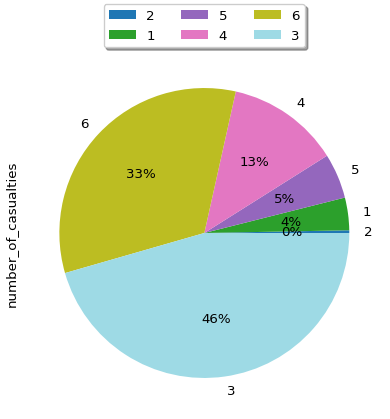

In [34]:
display(roadframe)

In [35]:
#SQL Context
sqlContext.registerDataFrameAsTable(roadframe, "MyTable")

In [36]:
sqlContext.sql("select * from MyTable")

DataFrame[accident_index: string, accident_reference: string, accident_severity: string, accident_year: string, carriageway_hazards: string, date: string, day_of_week: string, did_police_officer_attend_scene_of_accident: string, first_road_class: string, first_road_number: string, junction_control: string, junction_detail: string, latitude: double, light_conditions: string, local_authority_district: string, local_authority_highway: string, local_authority_ons_district: string, location_easting_osgr: string, location_northing_osgr: string, longitude: double, lsoa_of_accident_location: string, number_of_casualties: int, number_of_vehicles: int, pedestrian_crossing_human_control: string, pedestrian_crossing_physical_facilities: string, police_force: string, road_surface_conditions: string, road_type: string, second_road_class: string, second_road_number: string, special_conditions_at_site: string, speed_limit: string, time: string, trunk_road_flag: string, urban_or_rural_area: string, wea

In [37]:
# Return distinct list of local_authority_highway
sqlContext.sql("SELECT distinct local_authority_highway FROM Mytable").show()

+-----------------------+
|local_authority_highway|
+-----------------------+
|              S12000006|
|              E08000016|
|              E06000027|
|              S12000021|
|              E06000009|
|                     -1|
|              E08000005|
|              E06000041|
|              E06000018|
|              E06000023|
|              E06000019|
|              E08000014|
|              E06000036|
|              W06000012|
|              E06000012|
|              E10000034|
|              S12000013|
|              E09000018|
|              W06000001|
|              E09000013|
+-----------------------+
only showing top 20 rows



In [38]:
Accident_type = roadframe.groupby("Accident_Severity","weather_conditions").count().sort("count")
Accident_type.show()

+-----------------+------------------+-----+
|Accident_Severity|weather_conditions|count|
+-----------------+------------------+-----+
|                1|                 6|    1|
|                1|                -1|    1|
|                1|                 3|    7|
|                2|                 6|   21|
|                1|                 7|   37|
|                1|                 8|   42|
|                1|                 9|   46|
|                1|                 4|   65|
|                1|                 5|   72|
|                3|                 6|   91|
|                2|                 3|  100|
|                2|                 7|  198|
|                1|                 2|  312|
|                3|                 3|  431|
|                2|                 4|  618|
|                3|                 7|  669|
|                2|                 5|  677|
|                2|                 9|  753|
|                2|                 8|  861|
|         

In [39]:
display(roadframe)

In [40]:
display(roadframe)

accident_index,accident_reference,accident_severity,accident_year,carriageway_hazards,date,day_of_week,did_police_officer_attend_scene_of_accident,first_road_class,first_road_number,junction_control,junction_detail,latitude,light_conditions,local_authority_district,local_authority_highway,local_authority_ons_district,location_easting_osgr,location_northing_osgr,longitude,lsoa_of_accident_location,number_of_casualties,number_of_vehicles,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,police_force,road_surface_conditions,road_type,second_road_class,second_road_number,special_conditions_at_site,speed_limit,time,trunk_road_flag,urban_or_rural_area,weather_conditions
2019010155306,010155306,3,2019,0,01/01/2019,3,1,3,104,4,8,51.569029,4,13,E09000031,E09000031,536731,187414,-0.02853,E01004427,1,2,0,5,1,1,6,6,0,0,20,17:42,2,1,1
2019010155632,010155632,3,2019,0,03/01/2019,5,1,3,3,-1,0,51.421328,4,23,E09000021,E09000021,521578,170594,-0.252843,E01002953,1,2,0,0,1,1,3,-1,-1,0,50,20:19,2,1,1
2019010155813,010155813,3,2019,9,04/01/2019,6,3,4,401,4,6,51.511937,4,1,E09000033,E09000033,530545,180898,-0.120148,E01004735,1,2,9,9,1,1,6,6,0,0,30,18:45,2,1,1
2019010155935,010155935,3,2019,0,05/01/2019,7,1,5,0,4,3,51.407501,4,22,E09000024,E09000024,529679,169255,-0.136886,E01003415,2,2,0,0,1,1,6,6,0,0,20,17:05,2,1,1
2019010156120,010156120,3,2019,0,07/01/2019,2,1,4,134,4,3,51.523709,1,5,E09000030,E09000030,533888,182295,-0.071472,E01004317,1,1,0,0,1,1,2,6,0,0,20,12:35,2,1,1
2019010156156,010156156,3,2019,0,07/01/2019,2,1,6,0,4,3,51.42737,1,7,E09000023,E09000023,540476,171752,0.019239,E01003237,1,2,0,0,1,1,6,6,0,0,20,14:15,2,1,1
2019010156209,010156209,3,2019,0,07/01/2019,2,1,3,200,4,3,51.489104,4,7,E09000023,E09000023,536139,178504,-0.040508,E01003250,2,2,0,0,1,1,6,6,0,0,30,21:43,2,1,1
2019010156285,010156285,3,2019,0,08/01/2019,3,1,3,503,4,3,51.587741,1,31,E09000014,E09000014,534247,189430,-0.06358,E01002068,1,2,0,0,1,1,6,6,0,0,30,11:15,2,1,1
2019010156291,010156291,3,2019,0,08/01/2019,3,1,3,4088,4,3,51.556456,1,28,E09000005,E09000005,521739,185633,-0.245347,E01000511,1,2,0,0,1,1,6,6,0,0,30,08:23,2,1,1
2019010156347,010156347,3,2019,0,08/01/2019,3,1,6,0,4,3,51.408102,4,23,E09000021,E09000021,518072,169040,-0.303761,E01002968,1,1,0,0,1,1,6,3,307,0,20,17:12,2,1,1


In [41]:
display(roadframe)


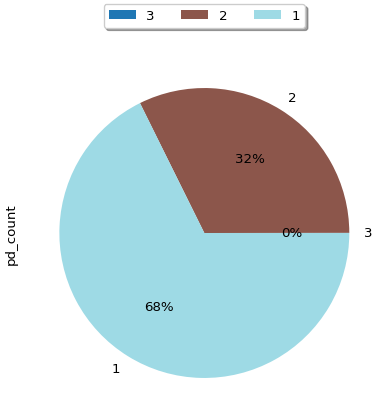

In [45]:
display(roadframe)


In [46]:
display(roadframe)

In [47]:
display(roadframe)